## **Funciones de trasmitancia, tilt, lentes y redes**

### **Referencias Bibliograficas:** Voelz, D. G. (2011). Computational Fourier Optics: a MATLAB tutorial. Bellingham: Spie Press.

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt


%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

# Campos a utilizar

In [ ]:
def rect2D(x): # FUNCION RECTANGULO EN 2D
  out = np.zeros((len(x),len(x)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(x)):
      out[cont,cont2]=int(np.abs(x[cont,cont2])<=1/2)
  return out

def circ(x,y,d): # FUNCION CÍRCULO
  out = np.zeros((len(x),len(y)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(y)):
      out[cont,cont2]=int(np.abs(np.sqrt(x[cont,cont2]**2+y[cont,cont2]**2)/d)<=1)
  return out

def propTF(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # propagation - transfer function approach
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  fx=np.arange(-1/(dx*2),1/(dx*2),1/L)  
  FX, FY = np.meshgrid(fx, fx);
  H=np.exp(-1j*np.pi*lam*z*(FX**2+FY**2))
  H= np.fft.fftshift(H)
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propIR(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - IMPULSE RESPONSE APPROACH
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  h=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X**2+Y**2))
  H= np.fft.fft2(np.fft.fftshift(h))*dx**2
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propFF(u1,L1,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - FRAUNHOFER PATTERN
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  # L2 - Oobservation plane side length
  N=len(u1[0,:]) 
  dx1=L1/N
  k=2*np.pi/lam
  L2=lam*z/dx1
  dx2=lam*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)  
  X2, Y2 = np.meshgrid(x2, x2);
  c=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X2**2+Y2**2))
  u2=c*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return u2, L2

#Función de transmitancia y ejemplo para el **Tilt**

In [ ]:
def tilt(uin,L,lam,z,alpha,theta): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # tilt phasefront
  # uniform sampling assumed
  # uin - input field
  # L - side length
  # lambda - wavelength
  # alpha - tilt angle
  # theta - rotation angle (x axis 0)
  # uout - output field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  uout =uin*np.exp(1j*k*(X*np.cos(theta)+Y*np.sin(theta))*np.tan(alpha))
  return uout

Ejemplo paara la pupila cuadrada

El número de Fresnel es  : 2.601 m
El muestreo usado es  : 0.00200 m
El crítico es  : 0.00200 m


<Figure size 1296x720 with 0 Axes>

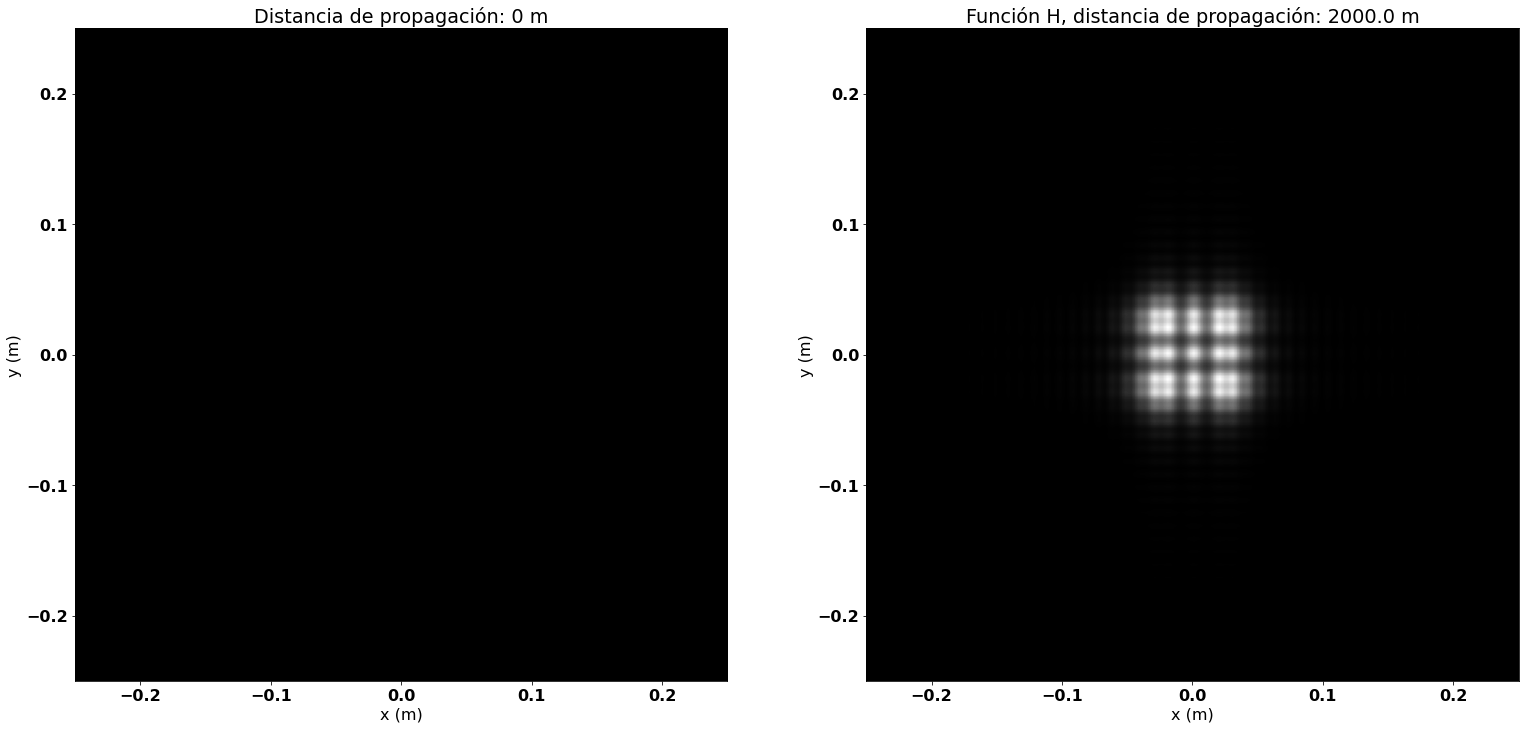

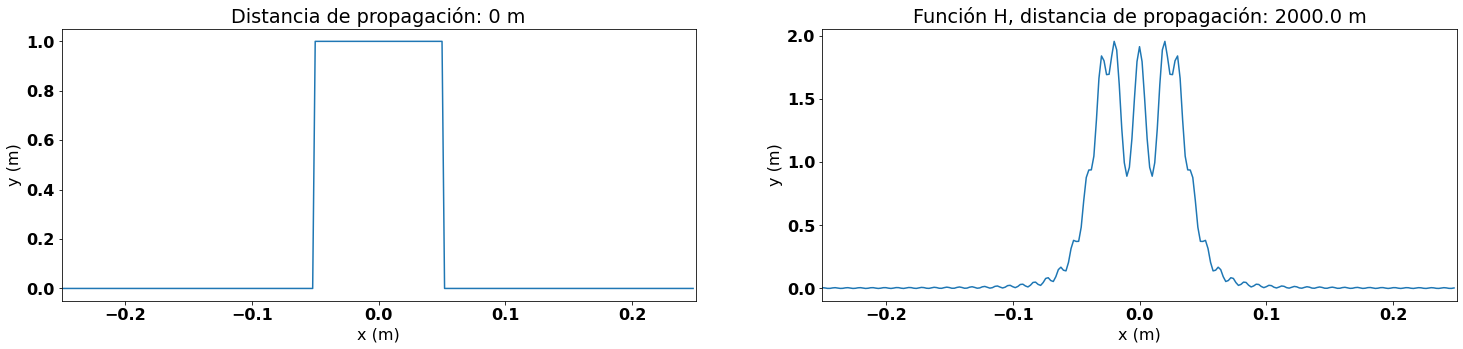

In [ ]:
L=0.5
N=250
dx=L/N
w=0.051
lam=0.5*1e-6
k=2*np.pi/lam
z=2000

deg=np.pi/180
alpha=0
theta=0*deg

x=np.arange(-L/2,L/2,dx)
y=x
X, Y = np.meshgrid(x, y);
u1 = rect2D(X/(2*w))*rect2D(Y/(2*w)) 
u1=tilt(u1,L,lam,z,alpha,theta)
I1=np.abs(u1)**(2)
A1=np.angle(u1)

u2=propTF(u1,L,lam,z)
x2=x
y2=y
I2=np.abs(u2)**(2)
A2=np.angle(u2)

# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,2,1)
plt.imshow(A1, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,2,2)
plt.imshow(I2, cmap='gray',extent=[-L/2,L/2,-L/2,L/2],origin='lower')
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.subplot(1,2,1)
plt.plot(x2,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,2,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


print('El número de Fresnel es  : %.3f m' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))

#Función de transmitancia y ejemplo para el **enfoque**

In [ ]:
def focus(uin,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # converging or diverging phase-front
  # uniform sampling assumed
  # uin - inputld
  # L - side length
  # lambda - wavelength
  # zf - focal distance (+ converge, - diverge)
  # uout - output field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  uout =uin*np.exp(-1j*k/(2*zf)*(X**2+Y**2))
  return uout

El número de Fresnel es  : 2.601 
El muestreo usado es  : 0.00200 m
El crítico es  : 0.00200 m


<Figure size 1296x720 with 0 Axes>

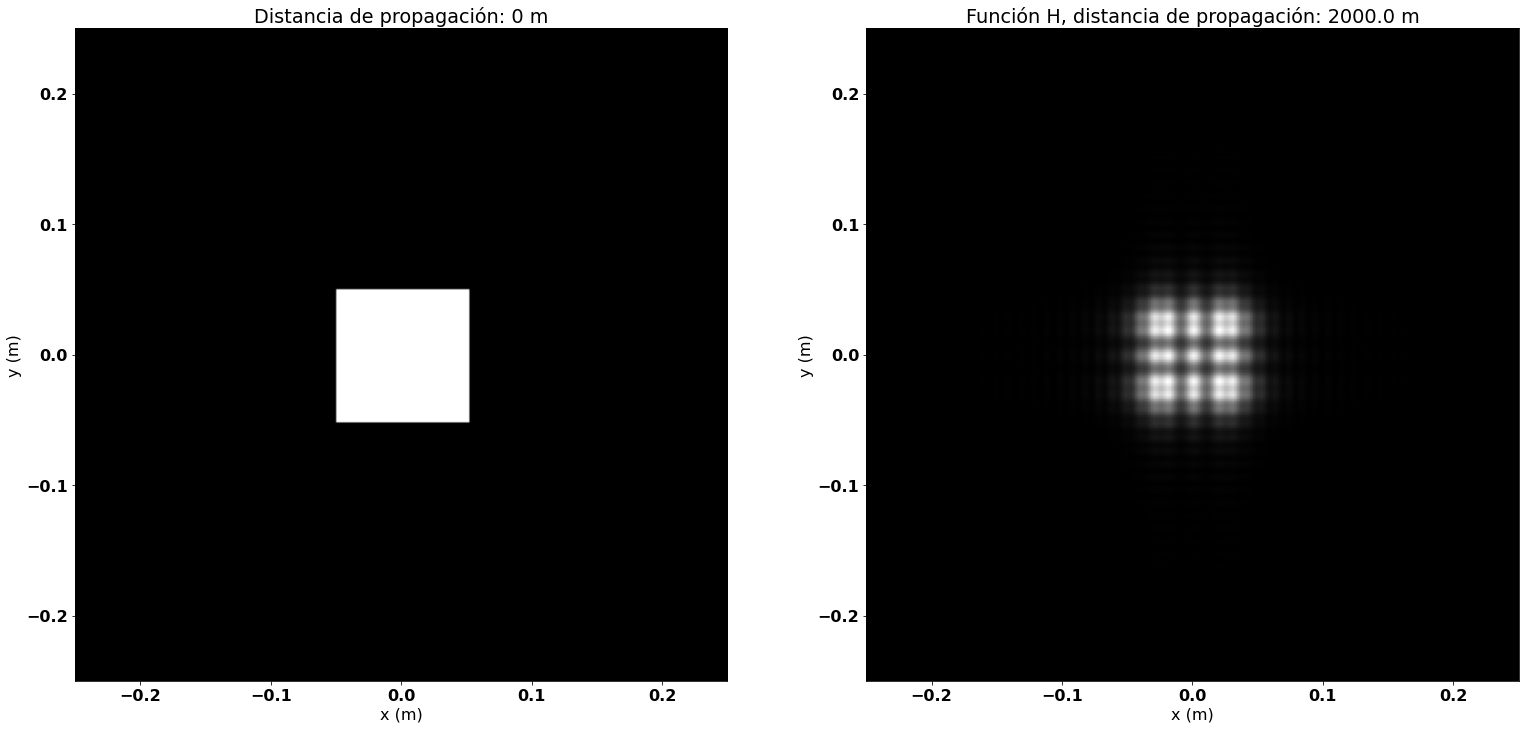

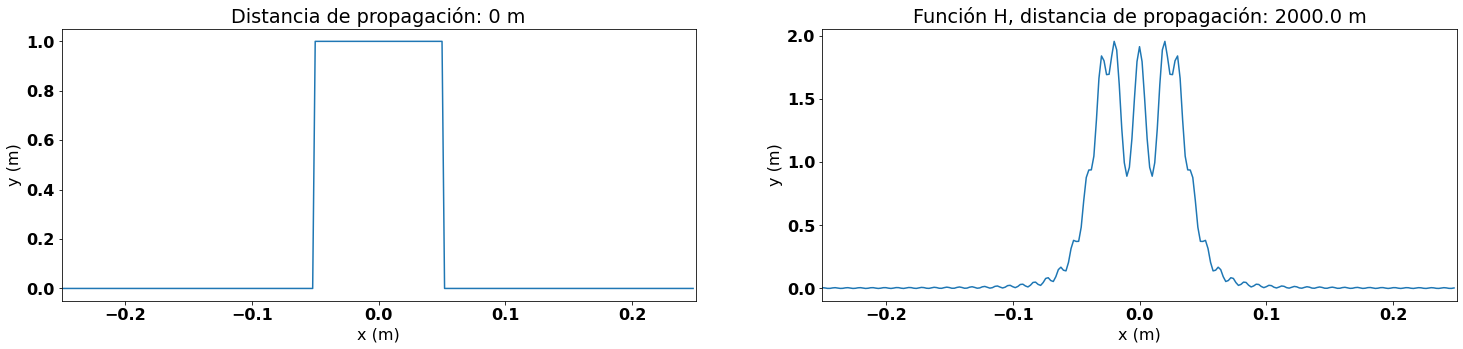

In [ ]:
L=0.5
N=250
dx=L/N
w=0.051
lam=0.5*1e-6
k=2*np.pi/lam
z=2000

zf=1000

x=np.arange(-L/2,L/2,dx)
y=x
X, Y = np.meshgrid(x, y);
u1 = rect2D(X/(2*w))*rect2D(Y/(2*w)) 
u1=focus(u1,L,lam,z)
I1=np.abs(u1)**(2)
A1=np.angle(u1)

u2=propTF(u1,L,lam,z)
x2=x
y2=y
I2=np.abs(u2)**(2)
A2=np.angle(u2)

# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,2,2)
plt.imshow(I2, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.subplot(1,2,1)
plt.plot(x2,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,2,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


print('El número de Fresnel es  : %.3f ' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))

# Función de transmitancia y ejemplo para una **lente**

In [ ]:
#############
from skimage import io

# Código de Google Colaboratory para subir el archivo y trabajar con él
from google.colab import drive 
drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/Colab Notebooks/Formacion_Imagen.tif' 'Formacion_Imagen.tif'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Ejemplo de formación de imagen 
Construcción del objeto:

(-0.05, 0.04990234375)

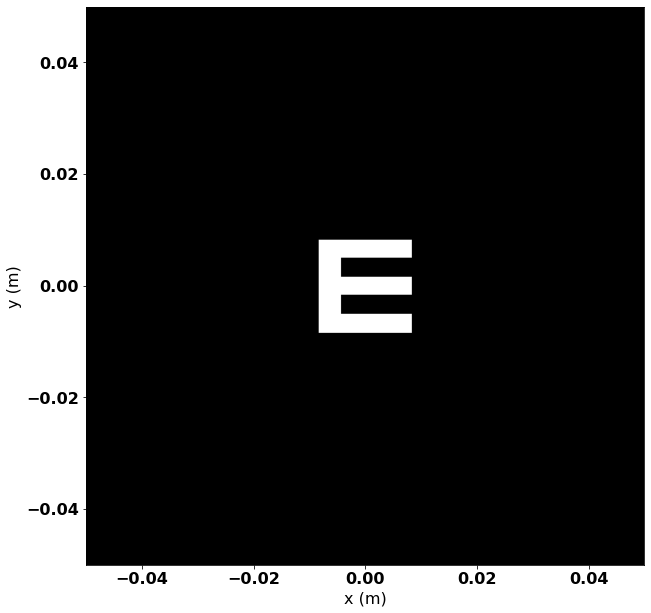

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,13))
fig.subplots_adjust(hspace=0.2)

################################################

# Cargo el objeto

IM1 = io.imread('Formacion_Imagen.tif')
IM1 = IM1/(np.max(np.max(IM1)))

# Área de observación, Tamaño de matriz y muestreo espacial
L=0.1
N=len(IM1[0,:]) 
dx=L/N

# parametros
zo=70
zi=50
f=25
lam=555e-9
k=2*np.pi/lam

# sistema de coordenadas
x=np.arange(-N*dx/2,N*dx/2,dx)
X,Y = np.meshgrid(x, x);

# imagen inicial (objeto)

plt.imshow(IM1, cmap='gray',extent=[-N*dx/2,N*dx/2-dx,-N*dx/2,N*dx/2-dx])
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=1
plt.xlim(mm*(-N*dx/2),mm*(N*dx/2-dx)) ## zoom para ver mejor la imagen
plt.ylim(mm*(-N*dx/2),mm*(N*dx/2-dx)) ## zoom para ver mejor la imagen: 

 **2** PROPAGACIÓN HASTA EL PLANO DE LA LENTE

(-0.05, 0.04990234375)

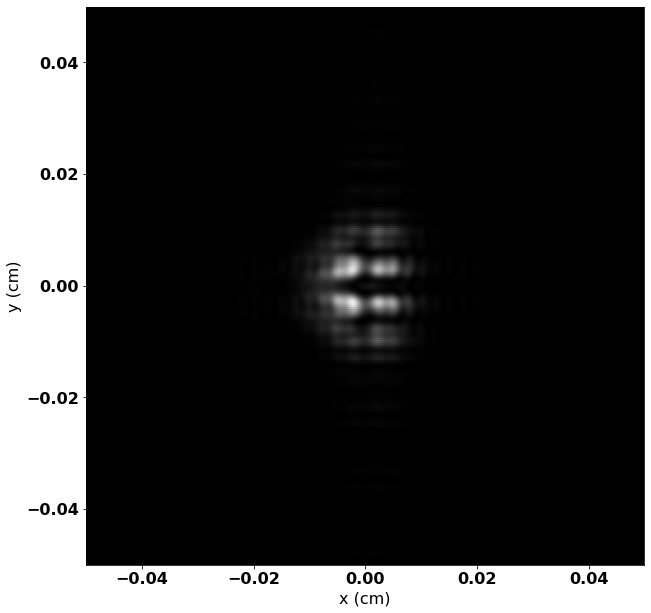

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,13))
fig.subplots_adjust(hspace=0.2)

u2=propTF(IM1,L,lam,zo)
################################################

# DISTRIBUCIÓN DE INTENSIDAD EN EL PLANO DE LA LENTE

plt.imshow(np.abs(u2)**2,cmap='gray',extent=[-N*dx/2,N*dx/2-dx,-N*dx/2,N*dx/2-dx])
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
mm=1
plt.xlim(mm*(-N*dx/2),mm*(N*dx/2-dx)) ## zoom para ver mejor la imagen
plt.ylim(mm*(-N*dx/2),mm*(N*dx/2-dx)) ## zoom para ver mejor la imagen

**2** MULTIPLICACIÓN POR FUNCIÓN DE TRANSMITANCIA (LENTE) Y PROPAGACIÓN HASTA EL PLANO IMAGEN

(-0.05, 0.04990234375)

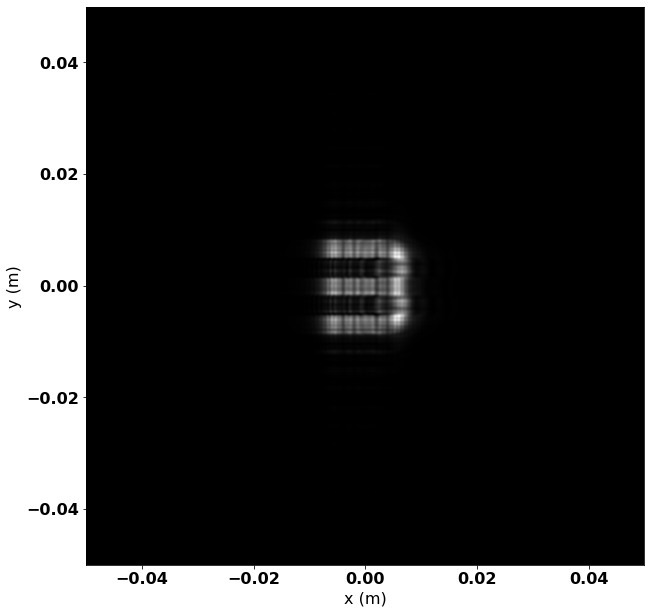

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,13))
fig.subplots_adjust(hspace=0.2)

## LENTE
ww=0.4
uout=circ(X,Y,ww)*u2*np.exp(-1j*k/(2*f)*(X**2+Y**2));

u4=propTF(uout,L,lam,zi)

################################################
# Grafica PLANO IMAGEN
plt.imshow(np.abs(u4)**2,cmap='gray',extent=[-N*dx/2,N*dx/2-dx,-N*dx/2,N*dx/2-dx])
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=1
plt.xlim(mm*(-N*dx/2),mm*(N*dx/2-dx)) ## zoom para ver mejor la imagen
plt.ylim(mm*(-N*dx/2),mm*(N*dx/2-dx)) ## zoom para ver mejor la imagen


# Función de transmitancia y ejemplo para una **red cosenoidal**

El número de Fresnel es  : 2.601 
El muestreo usado es  : 0.00010 m
El crítico es  : 0.01000 m
Hay 10.20000 periosos en la longitud de lado escogida


<Figure size 1296x720 with 0 Axes>

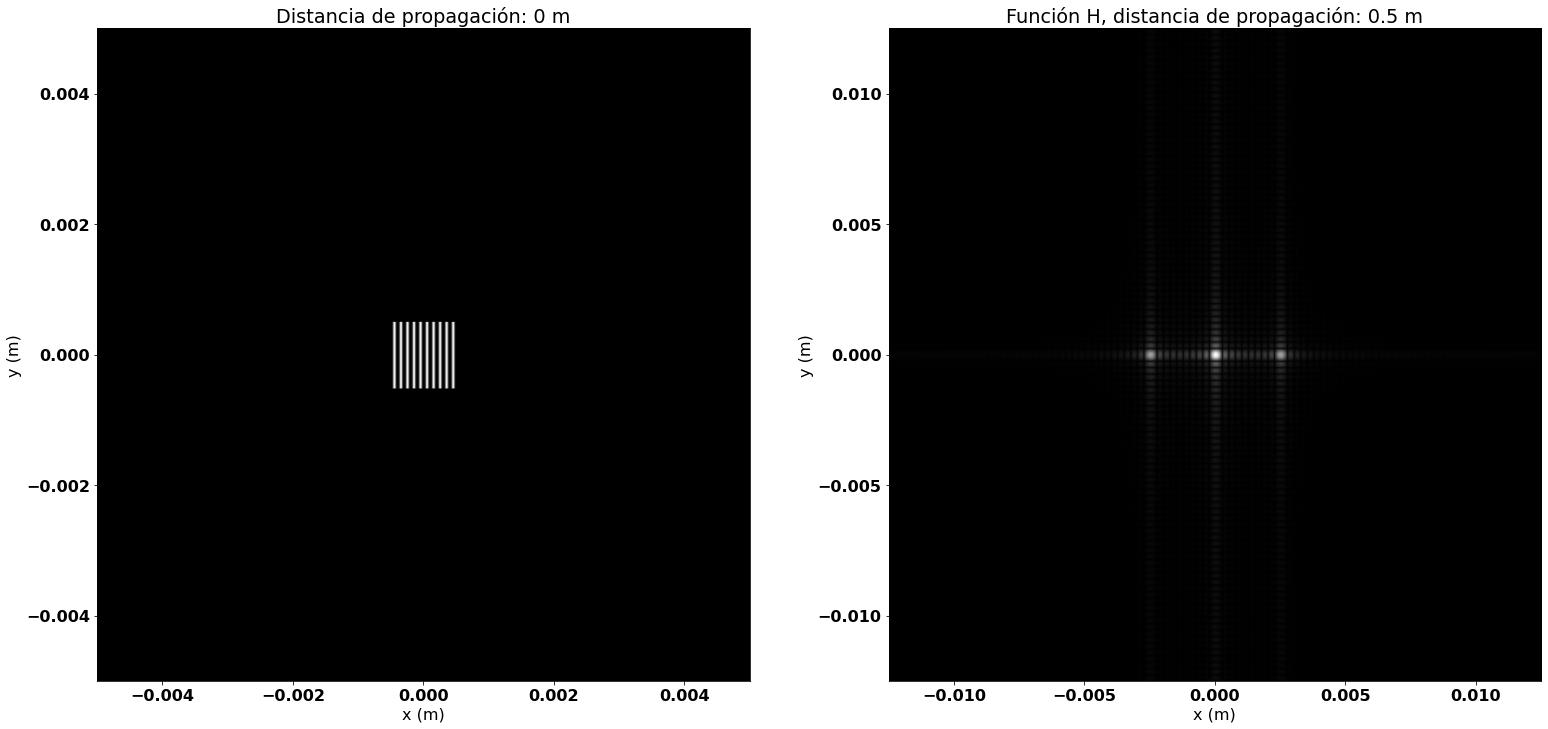

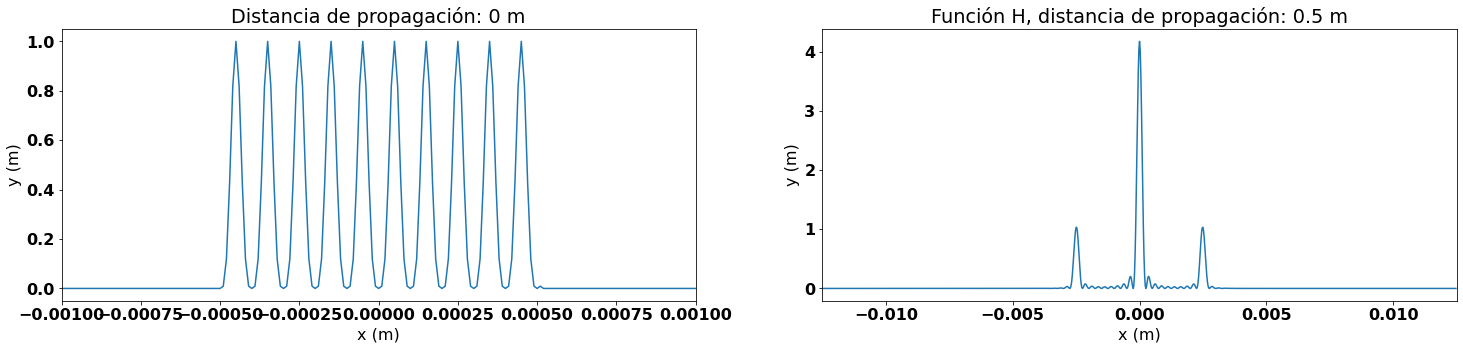

In [ ]:
L1=1e-2
N=1000
dx1=L1/N

P=1e-4
lam=0.5*1e-6
k=2*np.pi/lam
D1=1.02e-3
#D1=L1
f=0.5

x1=np.arange(-L1/2,L1/2,dx1)
y1=x1
X1, Y1 = np.meshgrid(x1, y1);
u1 =(1/2)*(1-np.cos(2*np.pi*X1/P))*rect2D(X1/(D1))*rect2D(Y1/(D1)) 

I1=np.abs(u1)**2
u2, L2=propFF(u1,L1,lam,f)
dx2=L2/N
x2=np.arange(-L2/2,L2/2,dx2)
y2=x2
I2=np.abs(u2)**(2)
A2=np.angle(u2)


# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray',extent=[-L1/2,L1/2,-L1/2,L1/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L1/2,m*0.1*L1/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L1/2,m*0.1*L1/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,2,2)
plt.imshow(I2**(1/3), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2])
plt.title('Función H, distancia de propagación: %.1f m' % f)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.subplot(1,2,1)
plt.plot(x1,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=2 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L1/2,m*0.1*L1/2) ## zoom para ver mejor la imagen

plt.subplot(1,2,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % f)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen


print('El número de Fresnel es  : %.3f ' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))
print('Hay %.5f periosos en la longitud de lado escogida' % (D1/P))

# **TAREA**: Reproducir el ejemplo de la red cuadrada del libro de Voelz

# Placas zonales hiperbólicas

El número de Fresnel es  : 2.365 
El muestreo usado es  : 0.00010 m
El crítico es  : 0.01100 m
Hay 10.20000 periodos en la longitud de lado escogida
20.081818181818182


<Figure size 1296x720 with 0 Axes>

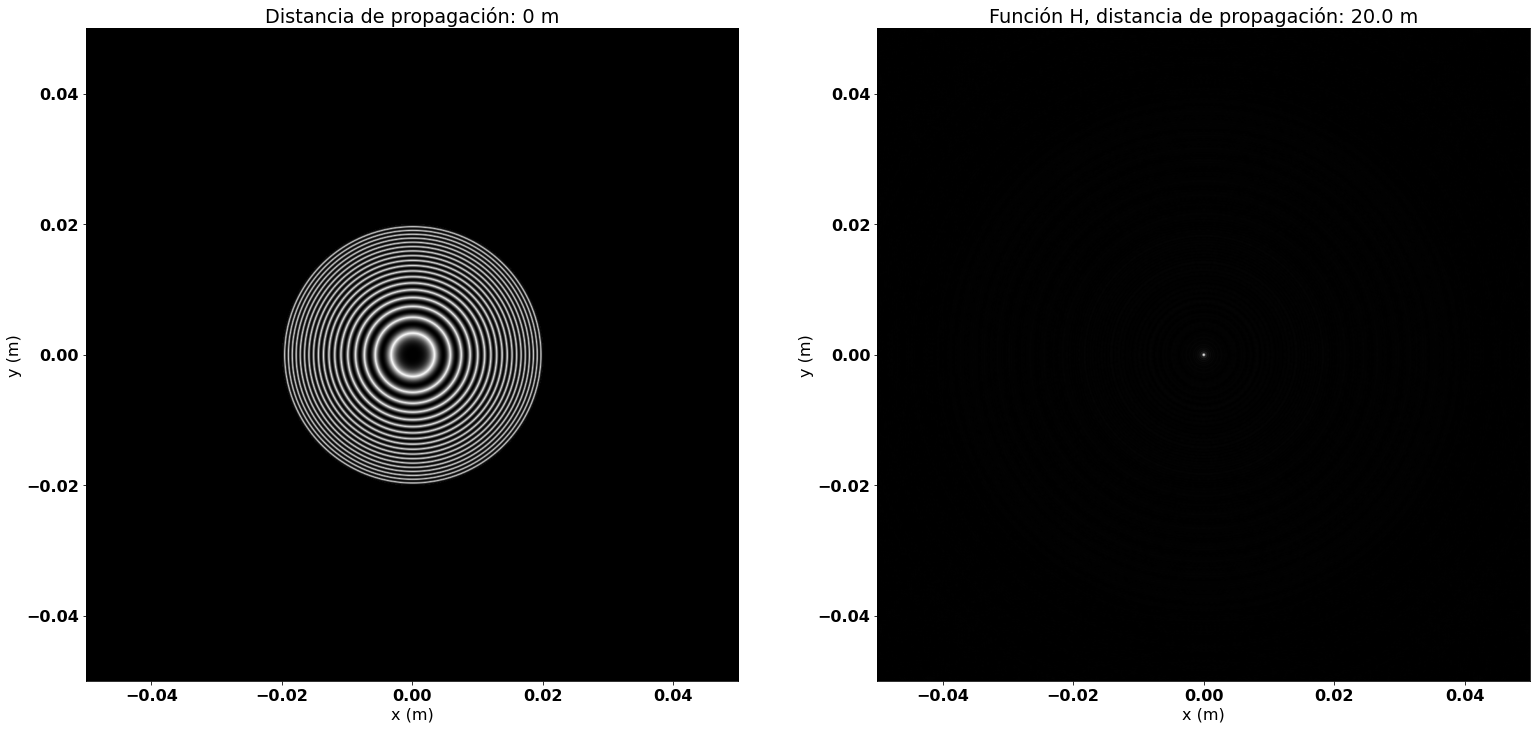

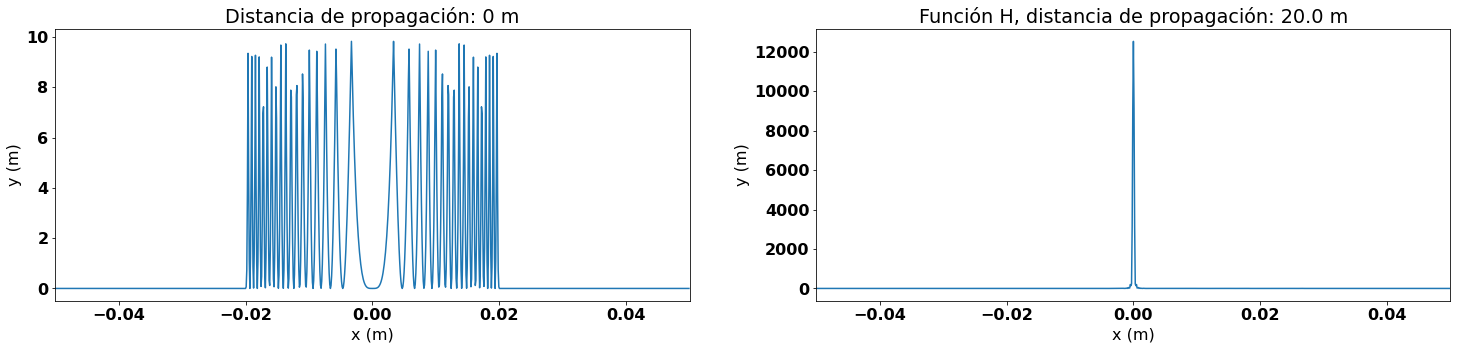

In [ ]:
L1=0.1
N=1024
dx1=L1/N
lam=0.55*1e-6
k=2*np.pi/lam
f=20
f1=15
ww=0.02

x1=np.arange(-L1/2,L1/2,dx1)
y1=x1
X1, Y1 = np.meshgrid(x1, y1);

u1=circ(X1,Y1,ww)*np.exp((-1j*k/(2*f))*(X1**2+Y1**2)); # placa zonal de fase de fresnel
u1=circ(X1,Y1,ww)*np.angle(u1);                        # placa zonal de amplitud de fresnel
ff=2*(0.00235)**2/((2*(1)-1)*lam) ## distancias focales                     

#u1=circ(X1,Y1,ww)*np.exp((-1j*k/(2*f))*(X1**2-Y1**2));  
#u1=circ(X1,Y1,ww)*np.angle(u1);                        


I1=np.abs(u1)**2
A1=np.angle(u1)


u2=propTF(u1,L,lam,ff)
I2=np.abs(u2)**(2)
A2=np.angle(u2)
L2=L1
x2=x1

# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray',extent=[-L1/2,L1/2,-L1/2,L1/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L1/2,m*0.1*L1/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L1/2,m*0.1*L1/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,2,2)
plt.imshow(I2**(1/2), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2])
plt.title('Función H, distancia de propagación: %.1f m' % f)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.subplot(1,2,1)
plt.plot(x1,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L1/2,m*0.1*L1/2) ## zoom para ver mejor la imagen

plt.subplot(1,2,2)
plt.plot(x1,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % f)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen


print('El número de Fresnel es  : %.3f ' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))
print('Hay %.5f periodos en la longitud de lado escogida' % (D1/P))
print(ff)